In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


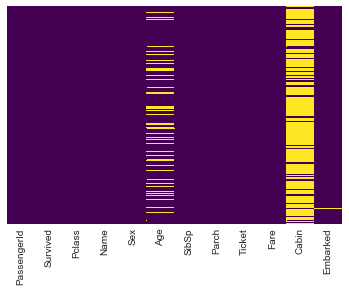

In [125]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [126]:
##There is maximum number of data points missing in 'Cabin'

In [127]:
sns.set_style('whitegrid')

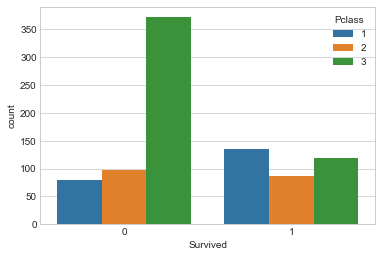

In [128]:
sns.countplot(x='Survived', hue='Pclass', data=train)

In [129]:
## Max survivors from class '1', and least from class '2'
## Max deaths from class '3', and least from class '1'

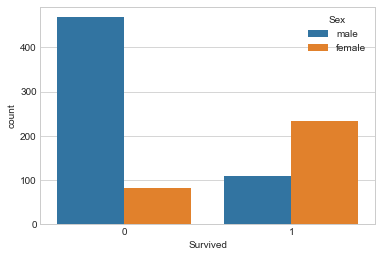

In [130]:
sns.countplot(x='Survived', hue='Sex', data=train)

In [131]:
## Max survivors were women
## Max deaths were of men

C:\Users\VEDANT NANDOSKAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


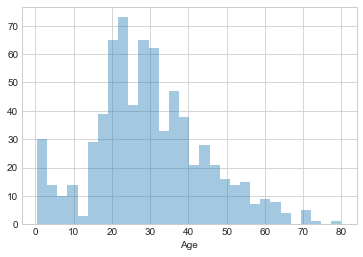

In [132]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [133]:
## Average age of passengers was between 20-30 years with elder people the least on board.

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


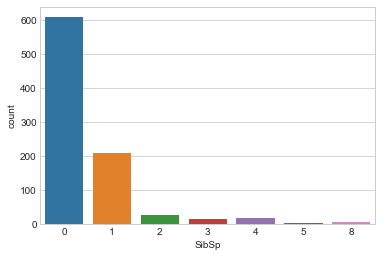

In [135]:
sns.countplot(x='SibSp', data=train)

In [136]:
## Most people were alone on board without any siblings or spouses

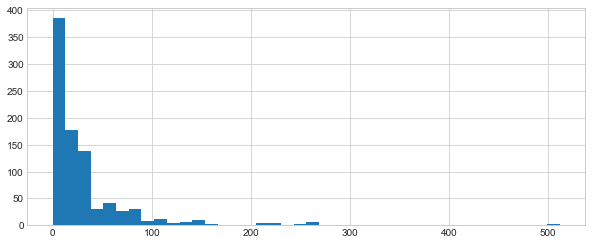

In [137]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [138]:
## Most passengers are in the cheaper tickets sections wich is in agreement
## with the max-deaths plot with respect to 'Pclass'

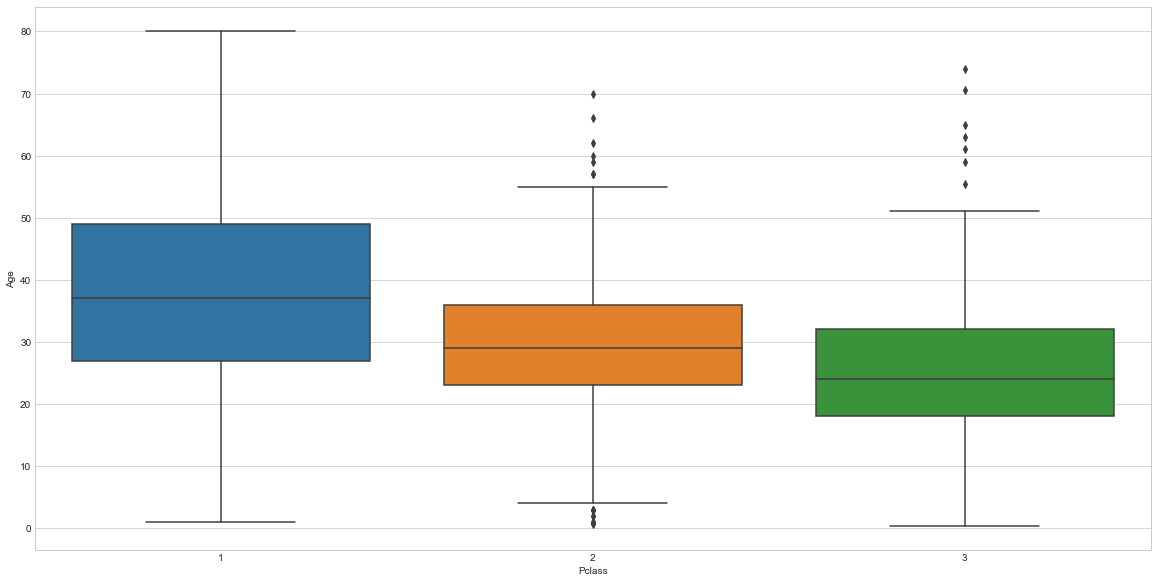

In [139]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass', y='Age', data=train)

In [140]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age

In [141]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

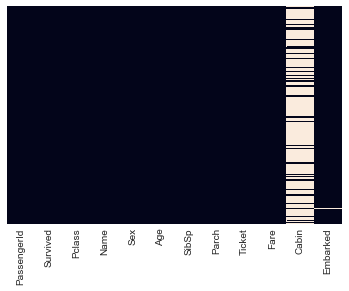

In [142]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [143]:
## Solved the missing data in Age 
## However Cabin needs to be dropped

In [144]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [145]:
## Drop the missing row in 'Embarked'
train.dropna(inplace=True)
test.dropna(inplace=True)

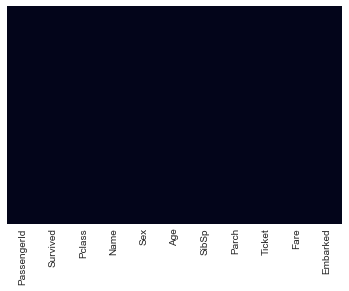

In [146]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [147]:
## Data is cleaned!

In [148]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex_test = pd.get_dummies(test['Sex'], drop_first=True)

In [149]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [150]:
train = pd.concat([train, sex, embark], axis=1)
test = pd.concat([test, sex_test, embark_test], axis=1)

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [152]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [153]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [154]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [155]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [156]:
train.drop('PassengerId', axis=1, inplace=True)
##index_test = test.drop('PassengerId', axis=1, inplace=False)
index_test = test['PassengerId']
index_test
##test.drop('PassengerId', axis=1, inplace=True)

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 417, dtype: int64

In [161]:
test.drop('PassengerId', axis=1, inplace=True)
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1
6,3,30.0,0,0,7.6292,0,1,0
7,2,26.0,1,1,29.0000,1,0,1
8,3,18.0,0,0,7.2292,0,0,0
9,3,21.0,2,0,24.1500,1,0,1


In [120]:
## Data filtered for machine learning algorithms

In [162]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [163]:
from sklearn.cross_validation import train_test_split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1, random_state=300)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
logmodel = LogisticRegression()

In [167]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
predictions = logmodel.predict(test)

In [171]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(index_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         0
        892       0.00      0.00      0.00         1
        893       0.00      0.00      0.00         1
        894       0.00      0.00      0.00         1
        895       0.00      0.00      0.00         1
        896       0.00      0.00      0.00         1
        897       0.00      0.00      0.00         1
        898       0.00      0.00      0.00         1
        899       0.00      0.00      0.00         1
        900       0.00      0.00      0.00         1
        901       0.00      0.00      0.00         1
        902       0.00      0.00      0.00         1
        903       0.00      0.00      0.00         1
        904       0.00      0.00      0.00         1
        905       0.00      0.00      0.00         1
        906       0.00      0.00      0.00         1
        907       0.00      0.00      0.00   

C:\Users\VEDANT NANDOSKAR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VEDANT NANDOSKAR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [175]:
from sklearn.metrics import confusion_matrix

In [176]:
confusion_matrix(index_test, predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [177]:
predictions


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [178]:
predictionsDataFrame = pd.DataFrame(
    data=predictions, columns=['Survived'])

In [179]:
predictionsDataFrame

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [180]:
predictionsDataFrame.to_csv('predictions_TitanicSurvival.csv', header=True, index_label='Index')